# Preamble

#### Get essentials

Import text and graph modules for analysis, and css for display

In [1]:
from dhlab.module_update import update, css, code_toggle, printmd

In [2]:
css()

In [3]:
code_toggle()

In [3]:
import dhlab.nbtext as nb
import dhlab.graph_networkx_louvain as gnl
import networkx as nx
from dhlab.graph_networkx_louvain import cutdown, make_collocation_graph
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import warnings

warnings.simplefilter("ignore")

# Analytic access to texts

## Aggregated
## Corpus
## Concordances/aggregated as collocations
## Document-term matrices
## Sequential analysis

# Aggregated




## Trend lines 


In [10]:
sample = nb.nb_ngram("Latvia, Litauen, Estland", corpus='avis', years=(1920, 2010), smooth=1).sort_index()
sample.head()

Latvia   Litauen   Estland
1920  0.000018  0.000104  0.000594
1921  0.000004  0.000033  0.000443
1922       NaN  0.000009  0.000179
1923  0.000011  0.000030  0.000143
1924  0.000007  0.000019  0.000252

In [6]:
def plotfig(a_plot, font_size = 18):
    fsize = plt.rcParams["font.size"]
    plt.rcParams["font.size"] = font_size
    ax = a_plot
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color("grey")
    ax.spines["left"].set_color("grey")
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    #plt.rcParams["font.size"] = fsize
    return

# Variasjon i utvikling

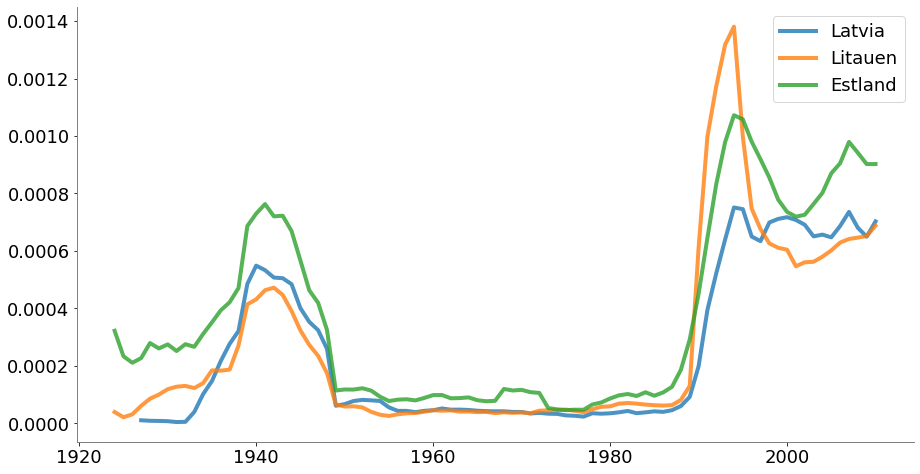

In [11]:
plotfig(sample.rolling(window=5).mean().plot(figsize=(15,8), lw=4, alpha=0.8))
plt.legend(loc=1, prop={'size': 18});

## Sovjetunionen

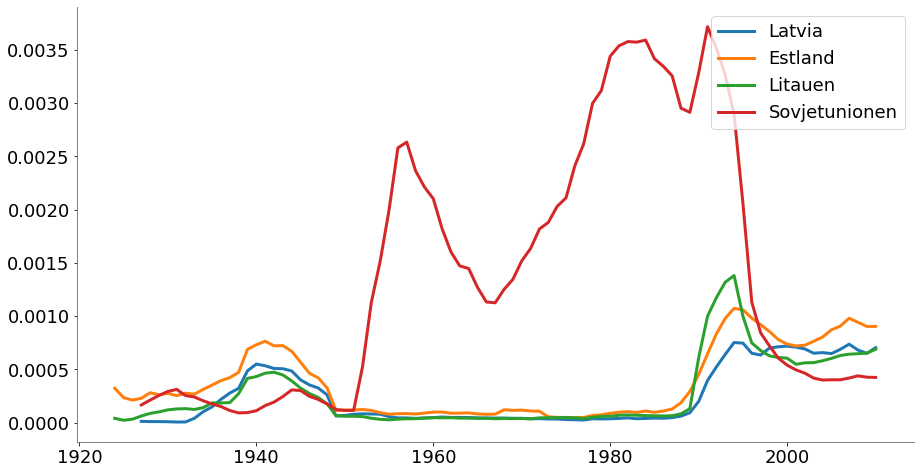

In [15]:
sample = nb.nb_ngram("Latvia, Estland, Litauen, Sovjetunionen", years=(1920, 2010), corpus='avis', smooth=1).sort_index()
plotfig(sample.rolling(window=5).mean().plot(figsize=(15,8), lw=3))
plt.legend(loc=1, prop={'size': 18});

## Rusland, Russland

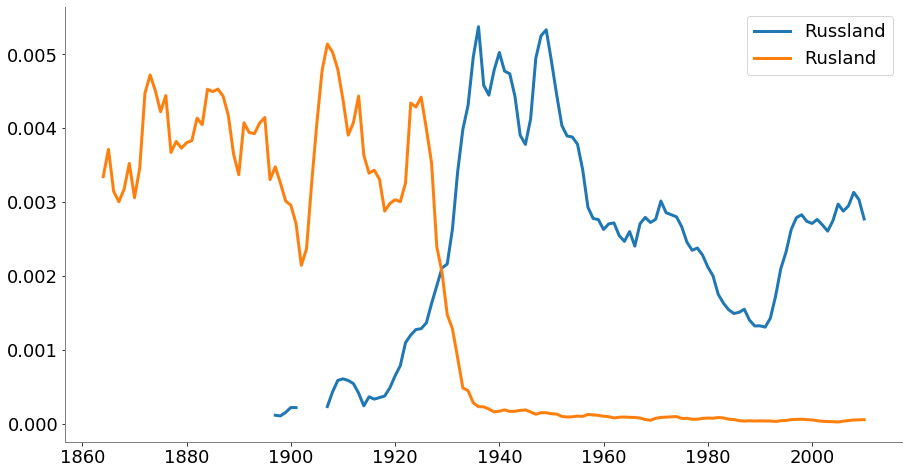

In [19]:
sample2 = nb.nb_ngram("Russland, Rusland", years=(1860, 2010), smooth=1).sort_index()
plotfig(sample2.rolling(window=5).mean().plot(figsize=(15,8), lw=3))

## Likestilling

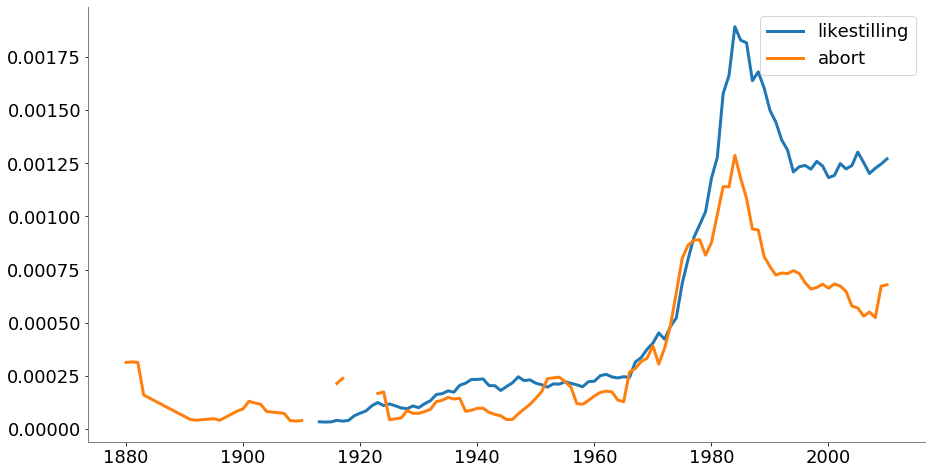

In [20]:
sample2 = nb.nb_ngram("likestilling, abort", years=(1860, 2010), smooth=1).sort_index()
plotfig(sample2.rolling(window=5).mean().plot(figsize=(15,8), lw=3))

# Spelling variants OCR-errors

In [184]:
nb.sorted_wildcardsearch({'word':'Trond*m', 'factor':2}).head(10)

Trond*m
Trondheim  1267672
Trondhjem   244121
Trondhiem     7514
Trondbjem     1545
Trondhjæm     1051
Trondem        831
Trondhem       699
Trondeim       448
Trondhjcm      352
Trondkjem      264

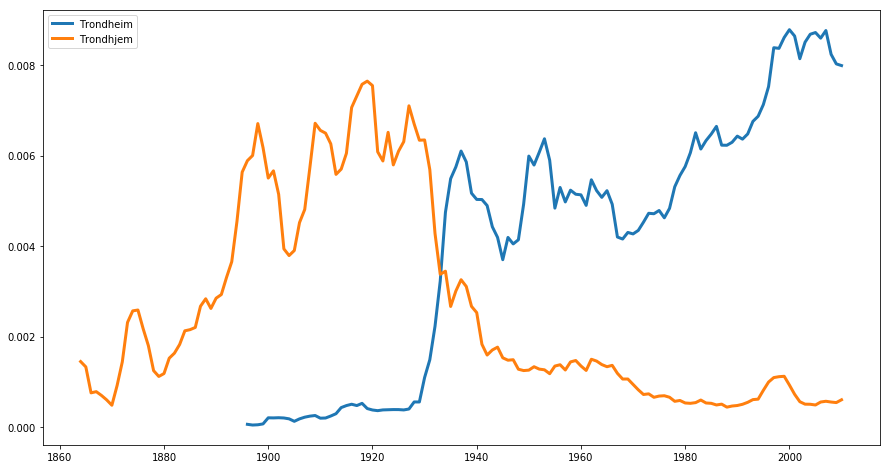

In [250]:
sample2 = nb.nb_ngram("Trondheim, Trondhjem", years=(1860, 2010), smooth=1)
sample2.rolling(window=5).mean().plot(figsize=(15,8), lw=3);

# Wordmodels

## Place name Os

In [93]:
G = nb.make_graph('is', cutoff = 12)

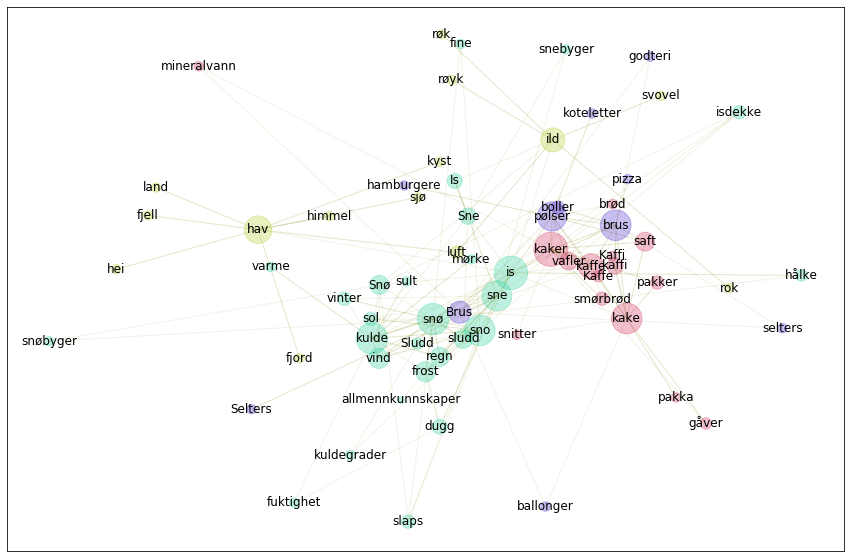

In [94]:
gnl.show_graph(G, spread = 1.9, fontsize=12)

## Clusters

In [95]:
gnl.show_community(G)

1 luft, ild, røk, kyst, hei, røyk, fjell, rok, fjord, himmel, land, hav, svovel, sjø

2 slaps, fine, is, fuktighet, Snø, Sne, vinter, sne, kuldegrader, frost, allmennkunnskaper, dugg, snø, varme, snøbyger, sol, kulde, sno, regn, Sludd, snebyger, isdekke, Is, sludd, sult, hålke, mørke, vind

3 koteletter, godteri, hamburgere, ballonger, pølser, pizza, Selters, Brus, brus, selters, boller

4 pakka, Kaffe, kaker, pakker, kake, saft, gåver, smørbrød, Kaffi, mineralvann, snitter, kaffe, kaffi, brød, vafler



True

## Cliques

In [96]:
gnl.show_cliques(G)

(3, 1) slaps, fine, kulde, sol, is, sno, regn, Sludd, Snø, Sne, ild, vinter, sne, isdekke, sludd, kuldegrader, frost, hålke, vind, snø

(3, 2) vafler, Kaffe, kaker, saft, smørbrød, kake, is, pølser, mineralvann, kaffe, Brus, kaffi, brus, brød, boller

(4, 1) kaker, saft, kake, is, pølser, kaffe, Brus, brus, vafler

(4, 2) vinter, kulde, is, sno, regn, frost, vind, snø

(5, 1) kaker, saft, kake, is, pølser, kaffe, Brus, brus, vafler



## Helse

In [32]:
G2 = nb.make_graph('helse', cutoff = 12)

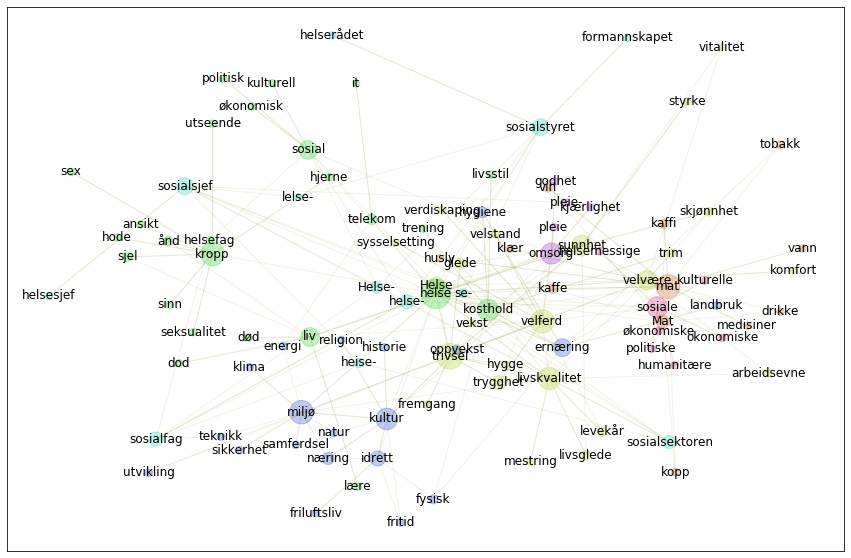

In [33]:
gnl.show_graph(G2, spread = 1.4, fontsize=12)

## Clusters

In [34]:
gnl.show_community(G2)

1 velferd, levekår, trivsel, mestring, sysselsetting, velvære, fremgang, styrke, vitalitet, verdiskaping, komfort, trim, skjønnhet, Helse, trygghet, livsglede, livskvalitet, sunnhet, vekst, velstand, glede, hygge, arbeidsevne

2 kosthold, trening, økonomisk, lære, telekom, dod, seksualitet, utseende, liv, død, sjel, helse, sex, politisk, hjerne, sinn, ånd, it, hode, kropp, ansikt, sosial, livsstil, kulturell, helsefag

3 sosialfag, sosialsektoren, helserådet, Helse-, helsesjef, lelse-, heise-, helse-, sosialsjef, sosialstyret, se-, formannskapet

4 oppvekst, ernæring, energi, utvikling, idrett, miljø, hygiene, natur, klima, fritid, religion, samferdsel, fysisk, kultur, teknikk, historie, friluftsliv, sikkerhet, landbruk, næring

5 godhet, kjærlighet, omsorg, pleie-, pleie

6 politiske, kulturelle, humanitære, økonomiske, helsemessige, okonomiske, sosiale

7 Mat, tobakk, vann, husly, medisiner, klær, vin, mat, kaffe, drikke, kaffi, kopp



True

## Cliques

In [35]:
gnl.show_cliques(G2)

(3, 1) velferd, tobakk, kosthold, levekår, helse, trivsel, næring, natur, ernæring, hygiene, utvikling, miljø, mat, skjønnhet, Helse, velvære, helse-, trygghet, kultur, livskvalitet, sunnhet, vekst, omsorg, glede, idrett, liv, fysisk, sosial, vitalitet, fritid, sosiale, arbeidsevne

(4, 1) velferd, helse, trivsel, miljø, velvære, trygghet, livskvalitet, sunnhet

(4, 2) ernæring, kosthold, helse, mat



# Books (and Newspapers)

### URN unique identifiers like: https://urn.nb.no/URN:NBN:no-nb_digibok_2009020200037 

## Corpus defined by some criteria

In [36]:
korpus = nb.get_urn({'year':1820, 'next': 100, 'limit':300})
nb.frame(korpus[:10])

0                    1  \
0  2014031808011       Nitsch, Georg.   
1  2010060806058                        
2  2012032124032     Collett, Camilla   
3  2011090220019      Aarrestad, Sven   
4  2009012203002   Petersen, Siegwart   
5  2014081408073      Lyng, Ge. Vilh.   
6  2013101408027  Talmage, T. de Witt   
7  2013110508370                        
8  2006081500045           Daae, Hans   
9  2008123010001         Hamsun, Knut   

                                                   2     3  
0                                     Vorder hellige  1868  
1                          Storthings-Efterretninger  1874  
2                                     Brev fra Paris  1881  
3            Praktisk sundhedslære for skole og hjem  1900  
4                                    Norges Historie  1892  
5  Om den Kyrenaiske skole, navnlig annikeris og ...  1868  
6                                    Kampen for Brød  1893  
7             Haandbog for den evang. luth. Frikirke  1887  
8                                       Henri Dunant  1899  
9                                        Livet ivold  1910

# Concordances 

In [37]:
nb.get_urnkonk('Trøndelag', {
    'urns':korpus[:50],
    'before': 10,
    'after': 10,
    'size':5
}, html=True)

# Collocation

# Compare with all

Vi kan samle sammen de 100 000 mest frekvente

In [38]:
tot = nb.frame(nb.totals(100000))

In [39]:
nb.normalize_corpus_dataframe(tot)

True

In [40]:
tot.head(20)

0
.    0.057135
,    0.049893
og   0.024530
i    0.020775
det  0.012342
som  0.011969
til  0.011488
er   0.011229
av   0.010616
en   0.010456
på   0.009298
for  0.009139
at   0.009007
-    0.008835
å    0.008315
med  0.008235
)    0.007776
var  0.006924
?    0.006855
den  0.006826

## Modern corpus 300 books

In [63]:
korpus = nb.get_urn({'year':1960, 'next': 100, 'limit':300})
nb.frame(korpus[:10])

0                  1  \
0  2016031648102                      
1  2014033108046   Nansen, Fridtjof   
2  2014110508005   Sandemose, Aksel   
3  2013070406009  Veggeland, Noralv   
4  2014011608097       Eide, Sindre   
5  2007082301024     Morrell, David   
6  2014073006054        Krogh, Finn   
7  2011042708073         Thue, Lars   
8  2010061808038   Graziunas, Daina   
9  2014071007158  Andreassen, Marit   

                                                   2     3  
0                                 Referat Lovseminar  2000  
1                           Nansens siste kjærlighet  2011  
2                             Det svundne er en drøm  1964  
3     Europapolitikk, innenrikspolitikk og kommunene  2005  
4                            Brødet ligger på bordet  1974  
5                                     Under to måner  1991  
6  Prosjektering av kabelanlegg for radio og fjer...  1992  
7                                     For egen kraft  2003  
8                                               Hevn  1996  
9        Rusforebyggende arbeid i videregående skole  2009

In [64]:
coll = nb.urn_coll('demokrati', urns=korpus)

In [65]:
nb.normalize_corpus_dataframe(coll)

True

In [66]:
diff = (coll**1.2/tot).sort_values(by = 0, ascending = False)

# Democracy from 1960 ...

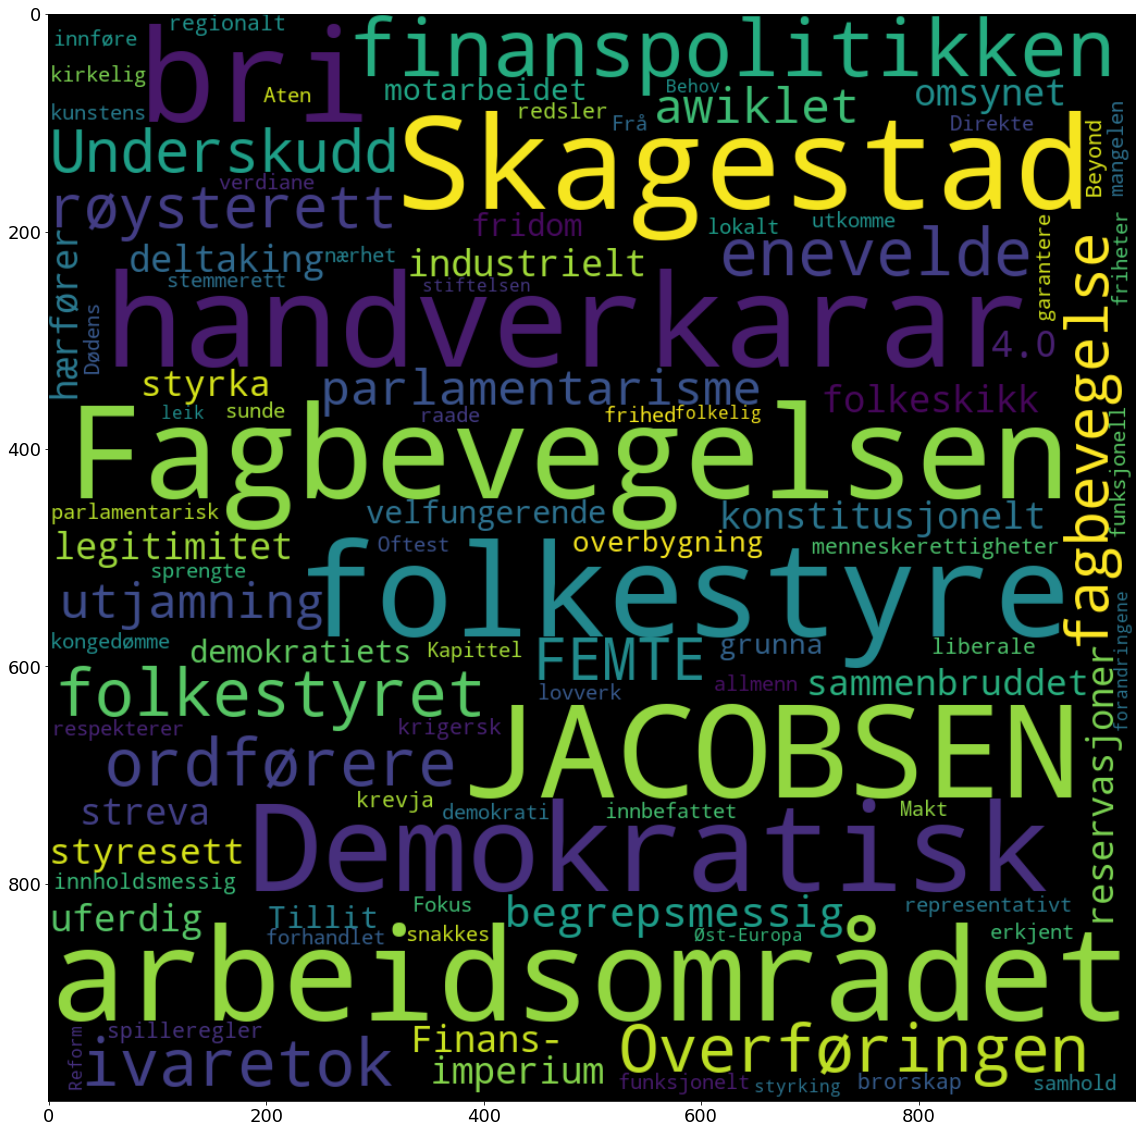

In [67]:
nb.cloud(diff.head(100)/diff.head(100).sum(), stretch=4)

# likestilling

In [68]:
coll2 = nb.urn_coll('likestilling', urns=korpus)

In [69]:
nb.normalize_corpus_dataframe(coll2)

True

In [70]:
diff2 = (coll2**1.5/tot).sort_values(by = 0, ascending = False)

In [71]:
d2 = nb.frame(diff2[0].loc[[x for x in diff2.index if x.isalpha()]])

In [72]:
#d2.head(20)

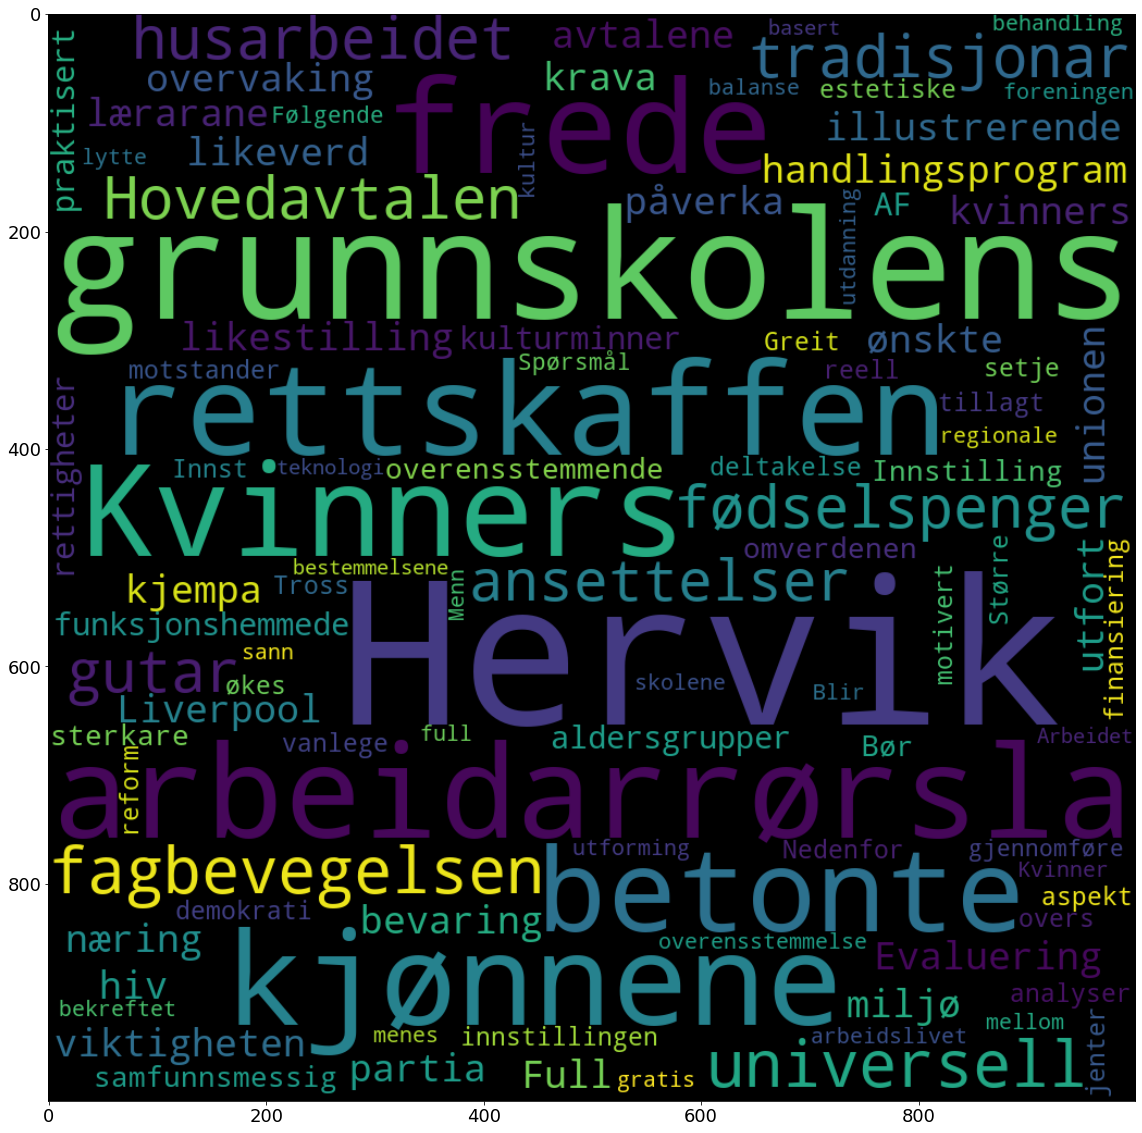

In [73]:
nb.cloud(d2.head(100)/d2.head(100).sum(), stretch=4)

# Names

In [74]:
books = nb.get_urn({'author':'fløgsta%'})

In [75]:
books

[[2008070700046, 'Fløgstad, Kjartan', 'Antipoder', 1996],
 [2012012406098, 'Fløgstad, Kjartan', 'Ved Roma port', 1994],
 [2010062908049, 'Fløgstad, Kjartan', 'Portrett av eit magisk liv', 1994],
 [2008102904054, 'Fløgstad, Kjartan', 'Sudamericana', 2000],
 [2008061000043, 'Fløgstad, Kjartan', 'Portrett av eit magisk liv', 1988],
 [2012011808064, 'Fløgstad, Kjartan', 'Fangliner', 1972],
 [2012100208023, 'Fløgstad, Kjartan', 'U3', 1983],
 [2008021204069, 'Fløgstad, Kjartan', 'Rasmus', 1995],
 [2009021204088,
  'Fløgstad, Kjartan',
  'Evig varer lengst, eller Where have all the lovers gone?',
  2000],
 [2008011601013, 'Fløgstad, Kjartan', 'Dikt og spelmannsmusikk', 1993]]

In [76]:
F = nb.navn(2008110504006)

In [77]:
Removals = nb.spurious_names(300)

In [78]:
Removals = Removals + ['Hvem', 'Hva', 'Hvorfor', 'Hei', 'Okay']

In [79]:
Fn = nb.check_navn(F, remove=Removals)

In [80]:
Fg = nb.make_network_graph(2008110504006, Fn)

# Dalen Portland, Fløgstad

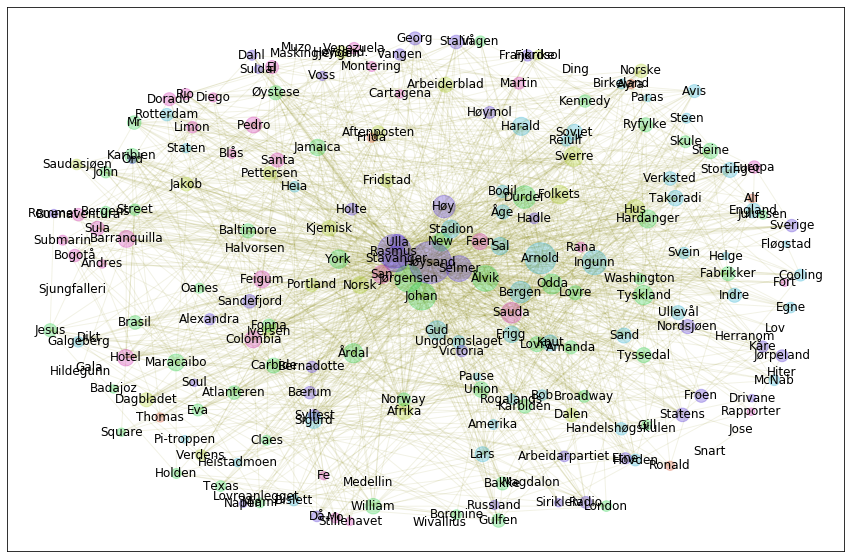

In [81]:
gnl.show_graph(Fg, spread=1.5, fontsize=12)

# Clustering of names

In [82]:
gnl.show_communities(Fg)

Sverre-Hus :  Sverre, Hus, Folkets, Norsk, Afrika, Kjemisk, Arbeiderblad, Fridstad, Dagbladet, Norske, Jakob, Dalen, Pettersen, Portland, Aftenposten, Iversen, Høysand., Verdens, Saudasjøen, Fjordsol, Magdalon

Johan-Jørgensen :  Johan, Jørgensen, Ålvik, Durdei, Odda, Tyskland, Årdal, New, York, Hardanger, Maracaibo, Jamaica, William, Steine, Union, Carbide, Tyssedal, Lovra, Karibien, Fabrikker, Baltimore, Lovre, Karbiden, Ryfylke, Øystese, Atlanteren, Gulfen, Mr, Brasil, Norway, Bakke, Jesus, Amanda, Fonna, Kennedy, Broadway, Skule, Eva, Street, John, London, Texas, Vågen, Bergens, Washington, Oanes, Borgnine, Miami, Gill, Claes, Holden, Julussen, Badajoz, Square, Gala, Dikt, Lovreanlegget

Arnold-Ingunn :  Arnold, Ingunn, Bergen, Gud, Stadion, Harald, Sal, Frigg, Sigurd, Knut, Takoradi, Sovjet, Stortinget, Sand, Lars, England, Indre, Ullevål, Åge, Verksted, Avis, Ungdomslaget, Bodil, Rotterdam, Handelshøgskulen, Hovden, Cooling, Bislett, Svein, Bob, Egne, Heia, Reiulf, Galgeberg, McN

# The clusters development in the book

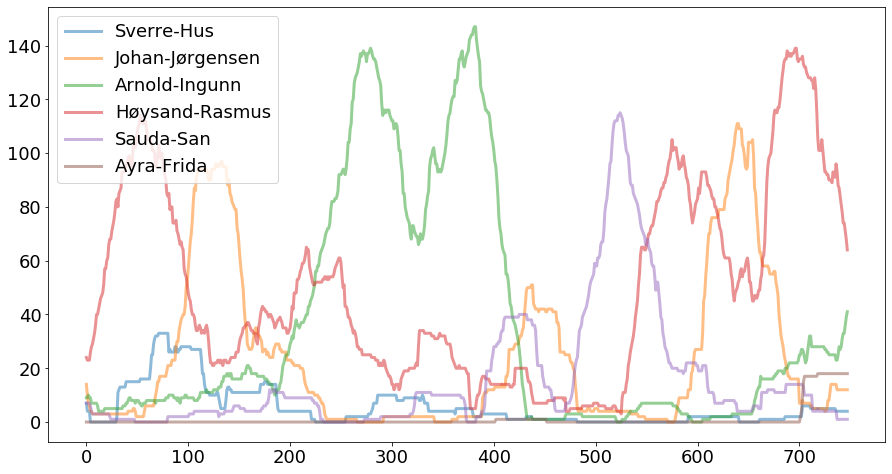

In [83]:
nb.plot_book_wordbags(2008110504006, gnl.community_dict(Fg)).plot(figsize=(15,8), lw=3, alpha=0.5);

# Network structure - betweennes

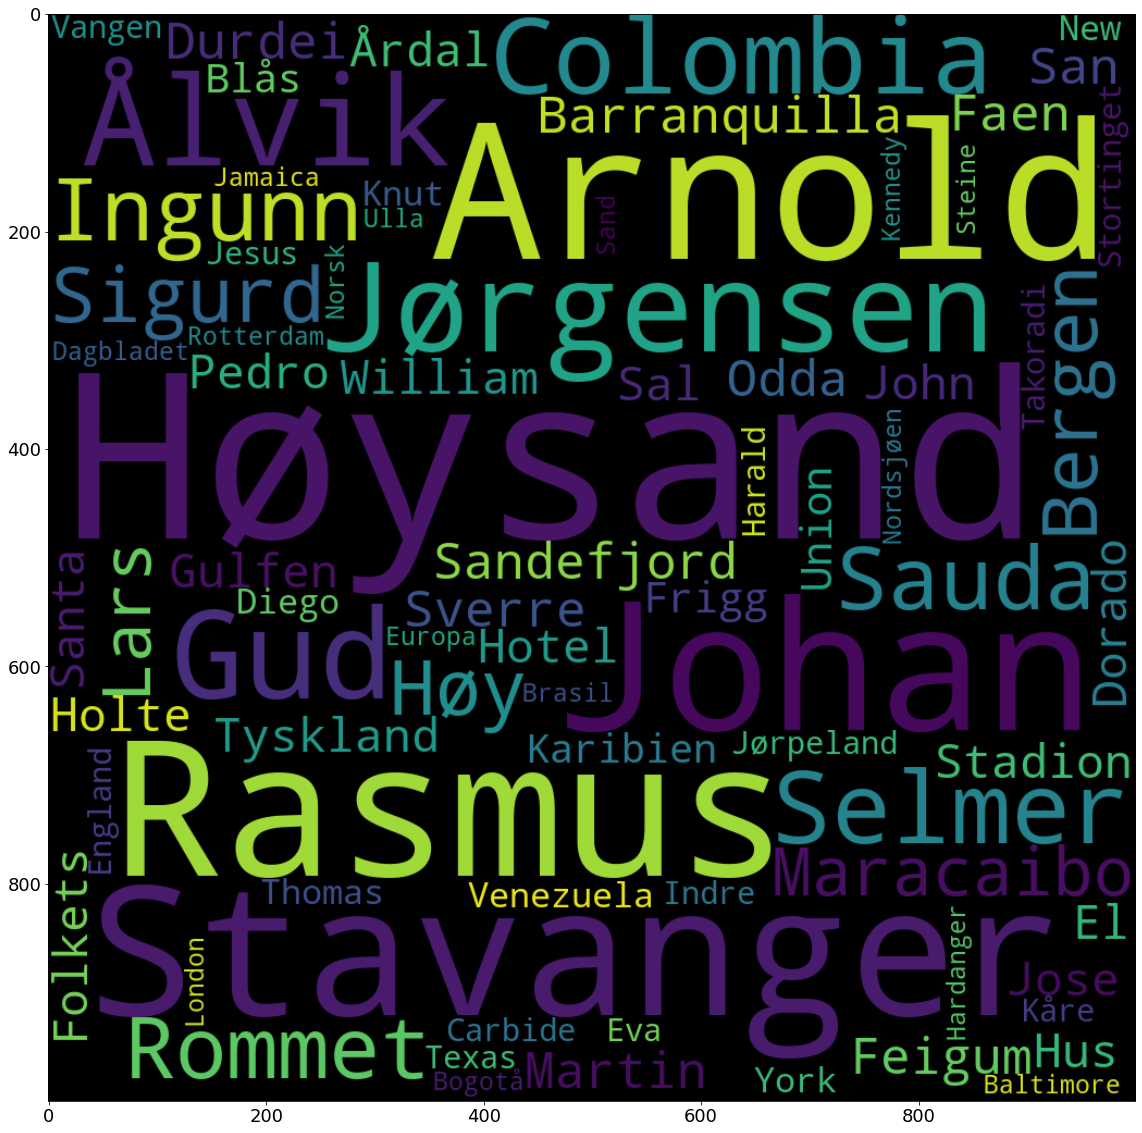

In [84]:
nb.cloud(nb.frame(dict(nb.central_betweenness_characters(Fg, 80))), stretch=3);

# Agnar Mykle, Sangen om den Røde Rubin

In [85]:
nb.get_urn({'author':'Mykle%', 'title': 'sang%', 'year':1955, 'next':60})

[[2009011504069, 'Mykle, Agnar', 'Sangen om den røde rubin', 2000],
 [2015090129001, 'Mykle, Agnar', 'Sangen om den røde rubin', 1956],
 [2008021404040, 'Mykle, Agnar', 'Sangen om den røde rubin', 1995],
 [2007052404016, 'Mykle, Agnar', 'Sangen om den røde rubin', 1967],
 [2008021104029, 'Mykle, Agnar', 'Sangen om den røde rubin', 1995],
 [2008100104083, 'Mykle, Agnar', 'Sangen om den røde rubin', 1998],
 [2016020808126, 'Mykle, Agnar', 'Sangen om den røde rubin', 2000],
 [2009033100094, 'Mykle, Agnar', 'Sangen om den røde rubin', 2002],
 [2008111304085, 'Mykle, Agnar', 'Sangen om den røde rubin', 2001]]

In [86]:
navn = nb.navn('2016020808126')

In [87]:
navn = nb.check_navn(navn, limit=10)

In [88]:
navn

{'Abrahamsen': 22,
 'Ask': 874,
 'Burlefot': 23,
 'Constance': 63,
 'Daniel': 121,
 'Daniels': 11,
 'Doffen': 105,
 'Du': 92,
 'Eirik': 46,
 'Embla': 84,
 'Er': 35,
 'Fiffolo': 41,
 'Floden': 32,
 'Francis': 29,
 'Frankrike': 18,
 'Gud': 88,
 'Guds': 13,
 'Gunnhild': 19,
 'Har': 26,
 'Hitler': 15,
 'Hm': 18,
 'Maia': 18,
 'Marx': 12,
 'Molly': 36,
 'Norge': 39,
 'Oslo': 13,
 'Poppi': 22,
 'Robert': 68,
 'Sosialistisk': 26,
 'Stabell': 35,
 'Stallen': 33,
 'Studentersamfunnet': 16,
 'Studentlag': 24,
 'Synnøve': 11,
 'Takk': 15,
 'Taraldsen': 20,
 'Tyskland': 25,
 'Vil': 15,
 'Villsvinsen': 25,
 'Wilhelmine': 44,
 'Wolfgang': 28,
 'Økonomiske': 44}

In [89]:
G = nb.make_network(2016020808126, navn)

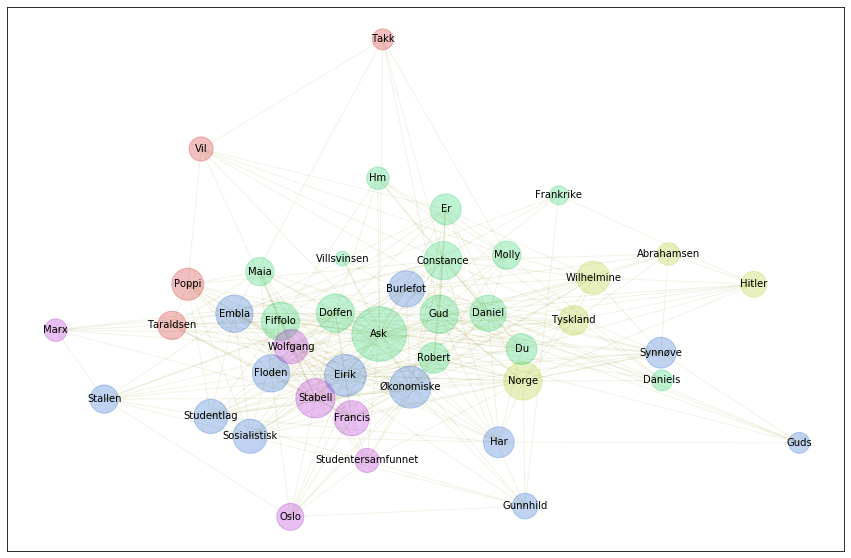

In [90]:
gnl.show_graph(G)

In [91]:
gnl.show_communities(G)

Norge-Wilhelmine :  Norge, Wilhelmine, Tyskland, Hitler, Abrahamsen

Ask-Fiffolo :  Ask, Fiffolo, Gud, Doffen, Constance, Daniel, Er, Du, Robert, Molly, Maia, Hm, Daniels, Frankrike, Villsvinsen

Økonomiske-Eirik :  Økonomiske, Eirik, Embla, Floden, Burlefot, Sosialistisk, Studentlag, Har, Synnøve, Stallen, Gunnhild, Guds

Stabell-Francis :  Stabell, Francis, Wolfgang, Oslo, Studentersamfunnet, Marx

Poppi-Taraldsen :  Poppi, Taraldsen, Vil, Takk



## Development of clusters

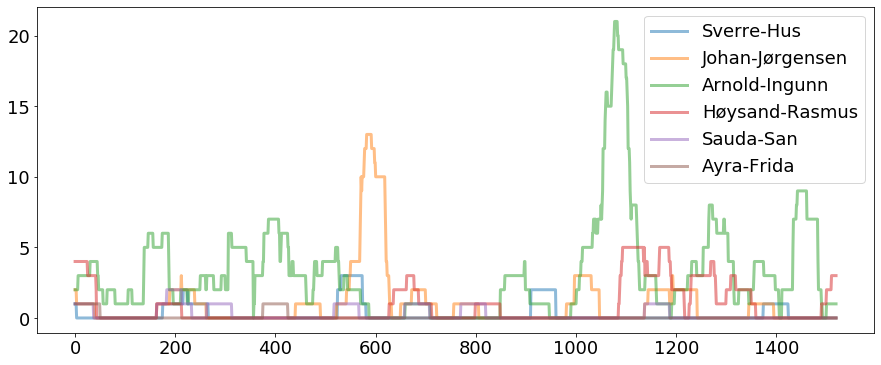

In [92]:
nb.plot_book_wordbags(2016020808126, gnl.community_dict(Fg)).plot(figsize=(15,6), lw=3, alpha=0.5);